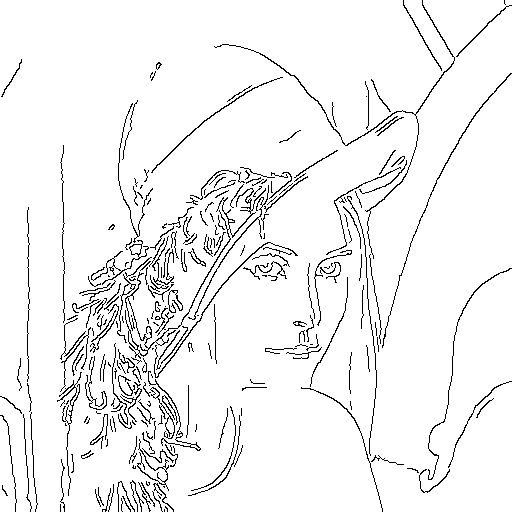

In [42]:
# Canny Method
import numpy as np
import cv2
import os
from PIL import Image

img    = cv2.imread('lena.png')
gray   = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
g_gray = cv2.GaussianBlur(gray, (5, 5), 0)
#threshold1, threshhold2 = 5, 95
threshold1, threshhold2 = 60, 95
r_canny = 255 - cv2.Canny(g_gray, threshold1, threshhold2, apertureSize = 3, L2gradient = True) # <- 255-をつけることで、白黒反転する
#cv2.imwrite('ex1_canny.png', r_canny) # <- デバックのため
pil_img = Image.fromarray(r_canny)
pil_img

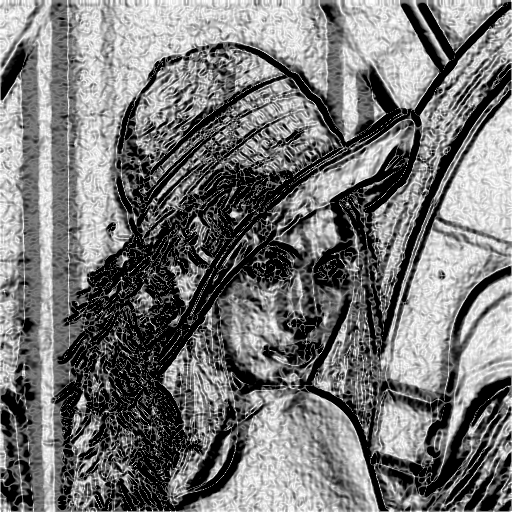

In [40]:
# Sobel Method
import numpy as np
import cv2
import os
from PIL import Image

img    = cv2.imread('lena.png')
gray   = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
g_gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Sobel フィルターの適用
#sobel_x = cv2.Sobel(g_gray, cv2.CV_32F, dx = 1, dy = 0, ksize = 3)
#sobel_y = cv2.Sobel(g_gray, cv2.CV_32F, dx = 0, dy = 1, ksize = 3)
sobel_x = cv2.Sobel(g_gray, cv2.CV_32F, dx = 1, dy = 0, ksize = 5)
sobel_y = cv2.Sobel(g_gray, cv2.CV_32F, dx = 0, dy = 1, ksize = 5)

# 勾配の絶対値を計算
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

# x, y 方向の勾配を合成
sobel_all = 255 - cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0) # <- 255-をつけることで、白黒反転する

#cv2.imwrite('ex1_sobel.png', sobel_all) # <- デバックのため
pil_img = Image.fromarray(sobel_all)
pil_img